# Problem Description:
# A Financial institution in India wants to leverage Machine Learning techniques to determine the client’s loan repayment abilities and take proactive steps to reduce the magnitude of exposure to default.

# Goal: The goal of the problem is to predict whether a client will default on the vehicle loan payment or not, given the recent data of all the loan transactions. This can help the institution to distinguish the future applicants who might default. For each ID in the Test Dataset, you must predict the “Default” level.

# ============================================================= #

# Note: Please answer the below descriptive question in the Jupyter Notebook Itself. This is going to carry more weightage in the final evaluation. This is an open-ended question and you are free to come up with a detailed explanation basis the analysis, model building exercise you have carried out.

# Q) Once you have a mechanism to estimate the “level of default”, please describe how the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for.

## Loading the necessary Libraries.

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")

## Reading the Train Dataset.

In [2]:
dftvs_train = pd.read_csv('Train_Set_TVS.csv')

In [3]:
dftvs_train.head(15)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.00,13816.52,0.0304,IT,ndf,Morethan_One,NaN,...,East,46,10,Yes,No,0.077,0.077,18.0,2,1
1,511643,884222.0,N,198075.00,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,North,46,12,Yes,Yes,0.184,0.184,306.0,4,0
2,506688,284120.0,N,101056.00,8390.40,0.0118,Govt.,ndf,One,4.0,...,North,57,5,Yes,Yes,0.538,0.538,281.0,4,0
3,499360,341874.0,N,179008.00,7184.13,0.0373,Non-IT,df,None,2.0,...,South,39,12,Yes,Yes,NaN,0.561,20.0,4,0
4,438350,1259895.0,Y,573715.00,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,...,North,32,16,Yes,Yes,NaN,0.200,2339.0,6,0
5,470028,1307402.0,Y,741690.00,10477.13,0.0236,Non-IT,ndf,One,4.0,...,North,43,14,Yes,Yes,0.703,0.703,1202.0,7,0
6,525234,757887.0,N,977270.00,10708.27,0.0089,IT,df,None,2.0,...,South,36,12,Yes,Yes,0.142,0.142,721.0,3,1
7,444411,866346.0,Y,187339.95,10269.91,0.0062,Non-IT,ndf,Morethan_One,1.0,...,North,50,9,Yes,Yes,0.669,0.669,NaN,2,0
8,466413,836238.0,NaN,318034.00,12528.06,0.0368,IT,ndf,One,4.0,...,South,52,12,Yes,Yes,0.910,0.910,12.0,4,0
9,497049,822222.0,N,265048.00,8849.20,0.0138,Non-IT,ndf,One,4.0,...,East,34,12,Yes,Yes,0.757,NaN,888.0,6,1


In [4]:
dftvs_train.tail(15)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
132425,516954,1178814.0,Y,689486.0,19779.33,NaN,Govt.,ndf,One,4.0,...,Central,65,13,Yes,Yes,0.790,0.790,363.0,7,0
132426,505086,817570.0,N,203268.0,9902.40,0.0366,IT,ndf,One,4.0,...,North,42,21,Yes,Yes,0.680,0.680,921.0,4,1
132427,495757,1388916.0,Y,760840.0,11301.28,0.0398,Non-IT,ndf,One,4.0,...,North,56,12,Yes,No,NaN,0.371,1238.0,2,0
132428,512368,588336.0,NaN,560142.0,9828.25,0.0312,NaN,ndf,One,4.0,...,South,50,13,Yes,Yes,0.256,0.256,354.0,0,0
132429,424163,635105.0,N,140250.0,10171.93,0.0179,Govt.,ndf,One,4.0,...,Central,39,12,Yes,Yes,0.697,0.697,885.0,3,0
132430,406907,693226.0,N,458448.0,12398.96,0.0127,IT,ndf,One,4.0,...,East,40,14,Yes,Yes,0.742,0.742,3492.0,4,0
132431,525932,785574.0,N,147741.0,9571.42,NaN,IT,ndf,One,4.0,...,North,59,9,Yes,Yes,0.193,0.193,668.0,3,1
132432,559315,1978242.0,Y,614661.6,13426.92,0.0211,Non-IT,ndf,One,4.0,...,North,45,4,Yes,Yes,0.734,NaN,19.0,4,0
132433,433258,557308.0,N,281820.9,8848.72,0.0311,IT,ndf,One,4.0,...,North,53,11,Yes,Yes,0.194,0.194,928.0,6,0
132434,492520,379746.0,N,123336.0,8635.14,0.0035,Non-IT,ndf,One,4.0,...,Central,46,9,Yes,Yes,0.363,0.363,2556.0,9,0


### Basic Data Exploration on Tvs_Train_dataset.

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **head of the dataset**
- **shape of the dataset**
- **info of the dataset**
- **summary of the dataset**

In [5]:
dftvs_train.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,...,East,46,10,Yes,No,0.077,0.077,18.0,2,1
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,North,46,12,Yes,Yes,0.184,0.184,306.0,4,0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,...,North,57,5,Yes,Yes,0.538,0.538,281.0,4,0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,...,South,39,12,Yes,Yes,NaN,0.561,20.0,4,0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,...,North,32,16,Yes,Yes,NaN,0.200,2339.0,6,0


In [6]:
dftvs_train.shape

(132440, 33)

In [7]:
dftvs_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  object 
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  object 
 7   Default_hist        132440 non-null  object 
 8   Prop_List           130475 non-null  object 
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  object 
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  object 
 13  Marital_Stat        132440 non-null  object 
 14  Gen                 132440 non-null  object 
 15  Credit_Lnks         132440 non-nul

In [8]:
dftvs_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,132440.0,NaN,NaN,NaN,488938.279319,58568.207772,387652.0,438095.5,488952.5,539702.0,590407.0
Compensation,126198.0,NaN,NaN,NaN,745051.897431,470276.230114,152728.0,517706.0,665996.0,879489.0,70377021.0
Vehicle_Status,123336,2,N,81370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loan_amt,132440.0,NaN,NaN,NaN,414801.133722,274678.779207,34275.0,204529.95,349542.5,558205.0,2872142.0
Annuity_amt,127829.0,NaN,NaN,NaN,10845.286442,2061.529355,5852.1,9348.37,10773.82,12165.39,41301.0
density_Ind,127024.0,NaN,NaN,NaN,0.020446,0.015077,0.0001,0.0104,0.0204,0.0304,2.0178
Job_Type,122192,3,IT,66982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Default_hist,132440,2,ndf,119170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prop_List,130475,3,One,91559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home_Appliances,121476.0,NaN,NaN,NaN,3.220891,1.241751,1.0,2.0,4.0,4.0,19.0


In [9]:
dftvs_train.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents              int64
Company_Rating        float64
Region                 object
Age                     int64
hour_Process            int64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought          int64
Default                 int64
dtype: obj

## Reading the Tvs Test Dataset.

In [10]:
dftvs_test = pd.read_csv('Test_Set_TVS.csv')
dftvs_test

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,...,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,...,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,...,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,...,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,...,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56755,513665,671640.0,N,260085.00,9654.50,0.0050,IT,ndf,One,4.0,...,2.0,North,42.0,11.0,Yes,Yes,0.716,0.716,215.0,7.0
56756,450327,650680.0,N,714467.60,14063.75,0.0321,NaN,ndf,One,NaN,...,3.0,East,47.0,9.0,Yes,Yes,NaN,0.193,22.0,0.0
56757,476417,551374.0,NaN,231420.00,11299.78,0.0334,Govt.,df,None,2.0,...,2.0,East,35.0,10.0,No,Yes,0.175,0.175,776.0,5.0
56758,461152,975117.0,N,1096620.00,10223.30,0.0052,IT,ndf,One,4.0,...,1.0,North,22.0,13.0,Yes,No,0.669,0.669,873.0,3.0


In [11]:
dftvs_test.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,...,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,...,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,...,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,...,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,...,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


### Basic Data Exploration on Tvs_Test_dataset

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **head of the dataset**
- **shape of the dataset**
- **info of the dataset**
- **summary of the dataset**

In [12]:
dftvs_test.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,...,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,...,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,...,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,...,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,...,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


In [13]:
dftvs_test.shape

(56760, 32)

In [14]:
dftvs_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  56760 non-null  int64  
 1   Compensation        54010 non-null  float64
 2   Vehicle_Status      52877 non-null  object 
 3   Loan_amt            56760 non-null  float64
 4   Annuity_amt         54797 non-null  float64
 5   density_Ind         54485 non-null  float64
 6   Job_Type            52440 non-null  object 
 7   Default_hist        56760 non-null  object 
 8   Prop_List           55849 non-null  object 
 9   Home_Appliances     52001 non-null  float64
 10  Region_Type         56760 non-null  object 
 11  Credit_Inq          55594 non-null  object 
 12  Education_det       56760 non-null  object 
 13  Marital_Stat        56760 non-null  object 
 14  Gen                 56760 non-null  object 
 15  Credit_Lnks         56760 non-null  object 
 16  Expe

In [15]:
dftvs_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,56760.0,NaN,NaN,NaN,489156.967089,58459.598434,387653.0,438878.0,488939.5,539700.5,590401.0
Compensation,54010.0,NaN,NaN,NaN,742311.044677,376480.936665,148330.0,516205.5,666744.0,877030.0,17276168.0
Vehicle_Status,52877,2,N,34721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loan_amt,56760.0,NaN,NaN,NaN,414563.148217,275984.861035,34777.5,203558.7,348862.85,559860.75,2743640.0
Annuity_amt,54797.0,NaN,NaN,NaN,10832.33484,2060.269444,6061.61,9344.36,10756.45,12142.34,38116.0
density_Ind,54485.0,NaN,NaN,NaN,0.020465,0.01679,0.0,0.0104,0.0203,0.0305,2.0372
Job_Type,52440,3,IT,28792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Default_hist,56760,2,ndf,51070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prop_List,55849,3,One,39222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home_Appliances,52001.0,NaN,NaN,NaN,3.220688,1.240932,1.0,2.0,4.0,4.0,19.0


In [16]:
dftvs_test.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
dtype: object

## Dropping unnecessary columns from Both Tvs_train_set & Tvs_Test_set.

In [17]:
dftvs_train.drop('ID',axis = 1,inplace = True)
test_file_ids = dftvs_test['ID'] ## necessary step
dftvs_test.drop('ID',axis = 1,inplace = True)

In [18]:
dftvs_train.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,...,East,46,10,Yes,No,0.077,0.077,18.0,2,1
1,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,...,North,46,12,Yes,Yes,0.184,0.184,306.0,4,0
2,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,...,North,57,5,Yes,Yes,0.538,0.538,281.0,4,0
3,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,...,South,39,12,Yes,Yes,NaN,0.561,20.0,4,0
4,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,...,North,32,16,Yes,Yes,NaN,0.200,2339.0,6,0


In [19]:
dftvs_train.tail(15)

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
132425,1178814.0,Y,689486.0,19779.33,NaN,Govt.,ndf,One,4.0,Metro,...,Central,65,13,Yes,Yes,0.790,0.790,363.0,7,0
132426,817570.0,N,203268.0,9902.40,0.0366,IT,ndf,One,4.0,Metro,...,North,42,21,Yes,Yes,0.680,0.680,921.0,4,1
132427,1388916.0,Y,760840.0,11301.28,0.0398,Non-IT,ndf,One,4.0,Metro,...,North,56,12,Yes,No,NaN,0.371,1238.0,2,0
132428,588336.0,NaN,560142.0,9828.25,0.0312,NaN,ndf,One,4.0,Metro,...,South,50,13,Yes,Yes,0.256,0.256,354.0,0,0
132429,635105.0,N,140250.0,10171.93,0.0179,Govt.,ndf,One,4.0,Metro,...,Central,39,12,Yes,Yes,0.697,0.697,885.0,3,0
132430,693226.0,N,458448.0,12398.96,0.0127,IT,ndf,One,4.0,Metro,...,East,40,14,Yes,Yes,0.742,0.742,3492.0,4,0
132431,785574.0,N,147741.0,9571.42,NaN,IT,ndf,One,4.0,Metro,...,North,59,9,Yes,Yes,0.193,0.193,668.0,3,1
132432,1978242.0,Y,614661.6,13426.92,0.0211,Non-IT,ndf,One,4.0,Metro,...,North,45,4,Yes,Yes,0.734,NaN,19.0,4,0
132433,557308.0,N,281820.9,8848.72,0.0311,IT,ndf,One,4.0,Metro,...,North,53,11,Yes,Yes,0.194,0.194,928.0,6,0
132434,379746.0,N,123336.0,8635.14,0.0035,Non-IT,ndf,One,4.0,Metro,...,Central,46,9,Yes,Yes,0.363,0.363,2556.0,9,0


In [20]:
dftvs_test.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,Metro,...,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,Metro,...,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,Rural,...,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,Metro,...,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,Metro,...,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


In [21]:
dftvs_test.tail(15)

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
56745,847189.0,Y,776783.0,11119.14,0.0326,IT,df,None,2.0,Metro,...,2.0,South,36.0,13.0,Yes,Yes,0.910,0.910,14.0,2.0
56746,519048.0,N,116675.0,10726.60,0.0115,Non-IT,ndf,One,4.0,Metro,...,NaN,North,60.0,14.0,Yes,Yes,0.741,0.741,1519.0,7.0
56747,1191575.0,Y,915780.9,13410.61,0.0328,IT,ndf,One,NaN,Metro,...,NaN,North,58.0,17.0,Yes,Yes,0.384,0.384,2189.0,0.0
56748,569392.0,N,433625.0,10085.58,0.0195,Non-IT,ndf,One,4.0,Rural,...,2.0,East,32.0,13.0,Yes,Yes,0.827,0.827,20.0,3.0
56749,362250.0,N,142009.0,NaN,0.0329,Govt.,ndf,NaN,1.0,Metro,...,2.0,East,48.0,9.0,Yes,Yes,0.351,0.351,12.0,3.0
56750,1299480.0,N,772023.0,12811.23,0.0197,IT,ndf,One,4.0,Metro,...,2.0,South,39.0,14.0,Yes,No,0.147,0.147,105.0,1.0
56751,1134528.0,Y,246205.0,10492.15,0.0135,Non-IT,ndf,One,4.0,Metro,...,2.0,North,52.0,14.0,Yes,Yes,0.584,0.584,242.0,7.0
56752,592515.0,Y,338450.0,9242.27,0.0125,IT,ndf,One,4.0,Metro,...,2.0,North,40.0,13.0,No,No,0.533,0.533,436.0,7.0
56753,428259.0,N,171430.0,11933.47,0.0154,IT,ndf,One,4.0,Metro,...,2.0,South,51.0,17.0,Yes,Yes,0.903,0.903,673.0,3.0
56754,384978.0,Y,380184.0,10549.84,0.0239,IT,ndf,One,4.0,Metro,...,2.0,South,25.0,17.0,Yes,Yes,0.198,0.198,1027.0,4.0


## EDA Process(Data Cleaning) for Train Data.

**We will be Cleaning the Data set and perform the exploratory data analysis on the dataset. The major topics to be covered are below:**

- **Removing duplicates**
- **Missing value treatment**
- **Outlier Treatment**

## 01 Check for Duplicate records For the TVS_Train_set Data.

In [22]:
# Check for duplicate data

dups = dftvs_train.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Converting the data Type from Float to object for Tvs_Train_set:

In [23]:
dftvs_train[['Company_Rating']] = dftvs_train[['Company_Rating']].astype('object')

In [24]:
dftvs_train[['Dependents']] = dftvs_train[['Dependents']].astype('float')

In [25]:
dftvs_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Compensation        126198 non-null  float64
 1   Vehicle_Status      123336 non-null  object 
 2   Loan_amt            132440 non-null  float64
 3   Annuity_amt         127829 non-null  float64
 4   density_Ind         127024 non-null  float64
 5   Job_Type            122192 non-null  object 
 6   Default_hist        132440 non-null  object 
 7   Prop_List           130475 non-null  object 
 8   Home_Appliances     121476 non-null  float64
 9   Region_Type         132440 non-null  object 
 10  Credit_Inq          129750 non-null  object 
 11  Education_det       132440 non-null  object 
 12  Marital_Stat        132440 non-null  object 
 13  Gen                 132440 non-null  object 
 14  Credit_Lnks         132440 non-null  object 
 15  Experience          110595 non-nul

## 02A Identifying & Treating the Null Values.

In [26]:
dftvs_train.isna().sum()

Compensation           6242
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt            4611
density_Ind            5416
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances       10964
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            21845
Income_Alt             7682
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated              17513
c2_rated              13321
Contact_age            8153
Product_bought            0
Default                   0
dtype: int64

In [27]:
dftvs_train.isnull().sum().sum()

131485

### Percentage of missing values in each variable for Tvs_train_set.

In [28]:
dftvs_train.isnull().sum().sort_values(ascending=False)/len(dftvs_train)

Experience            0.164943
c1_rated              0.132233
c2_rated              0.100581
Company_Rating        0.088576
Home_Appliances       0.082785
Job_Type              0.077378
Vehicle_Status        0.068741
Contact_age           0.061560
Income_Alt            0.058004
Compensation          0.047131
density_Ind           0.040894
Annuity_amt           0.034816
Credit_Inq            0.020311
Prop_List             0.014837
Region                0.000000
Product_bought        0.000000
Loan_amt              0.000000
Permanent_Addr_tag    0.000000
Addr_permanent        0.000000
hour_Process          0.000000
Age                   0.000000
Default_hist          0.000000
Education_det         0.000000
Dependents            0.000000
Type_Loan             0.000000
Ph.No                 0.000000
Day_Process           0.000000
Region_Type           0.000000
Credit_Lnks           0.000000
Gen                   0.000000
Marital_Stat          0.000000
Default               0.000000
dtype: f

## 02B Imputing Null Values from Numerical & Categorical Columns using Mean & mode.

In [29]:
for i in dftvs_train.columns:
    if (dftvs_train[i].dtype=='object'):
        dftvs_train[i].fillna(dftvs_train[i].mode()[0], inplace=True)
    elif (dftvs_train[i].dtype=='float64' or dftvs_train[i].dtype=='int64'):
        dftvs_train[i].fillna(dftvs_train[i].mean(), inplace=True)

## 02C Identifying the Null Values After Treatment.

In [30]:
dftvs_train.isna().sum()

Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Day_Process           0
Ph.No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
Default               0
dtype: int64

In [31]:
dftvs_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Compensation        132440 non-null  float64
 1   Vehicle_Status      132440 non-null  object 
 2   Loan_amt            132440 non-null  float64
 3   Annuity_amt         132440 non-null  float64
 4   density_Ind         132440 non-null  float64
 5   Job_Type            132440 non-null  object 
 6   Default_hist        132440 non-null  object 
 7   Prop_List           132440 non-null  object 
 8   Home_Appliances     132440 non-null  float64
 9   Region_Type         132440 non-null  object 
 10  Credit_Inq          132440 non-null  object 
 11  Education_det       132440 non-null  object 
 12  Marital_Stat        132440 non-null  object 
 13  Gen                 132440 non-null  object 
 14  Credit_Lnks         132440 non-null  object 
 15  Experience          132440 non-nul

### Converting the data Type from Float to object:

In [32]:
dftvs_train[['Company_Rating']] = dftvs_train[['Company_Rating']].astype('object')

In [33]:
###dftvs_train[['Dependents']] = dftvs_train[['Dependents']].astype('object')

In [34]:
dftvs_train[['Age']] = dftvs_train[['Age']].astype('float')

In [35]:
dftvs_train[['hour_Process']] = dftvs_train[['hour_Process']].astype('float')

In [36]:
dftvs_train[['Product_bought']] = dftvs_train[['Product_bought']].astype('float')

In [37]:
dftvs_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Compensation        132440 non-null  float64
 1   Vehicle_Status      132440 non-null  object 
 2   Loan_amt            132440 non-null  float64
 3   Annuity_amt         132440 non-null  float64
 4   density_Ind         132440 non-null  float64
 5   Job_Type            132440 non-null  object 
 6   Default_hist        132440 non-null  object 
 7   Prop_List           132440 non-null  object 
 8   Home_Appliances     132440 non-null  float64
 9   Region_Type         132440 non-null  object 
 10  Credit_Inq          132440 non-null  object 
 11  Education_det       132440 non-null  object 
 12  Marital_Stat        132440 non-null  object 
 13  Gen                 132440 non-null  object 
 14  Credit_Lnks         132440 non-null  object 
 15  Experience          132440 non-nul

In [38]:
dfts_train = dftvs_train.copy()
dfts_train.shape

(132440, 32)

In [39]:
##dftrain.info()

In [48]:
dftvs_train["Education_det"].value_counts()

Grad      93858
P_Grad    32457
Other      6125
Name: Education_det, dtype: int64

## 03 Outlier Checking for Train set & outlier treatment.

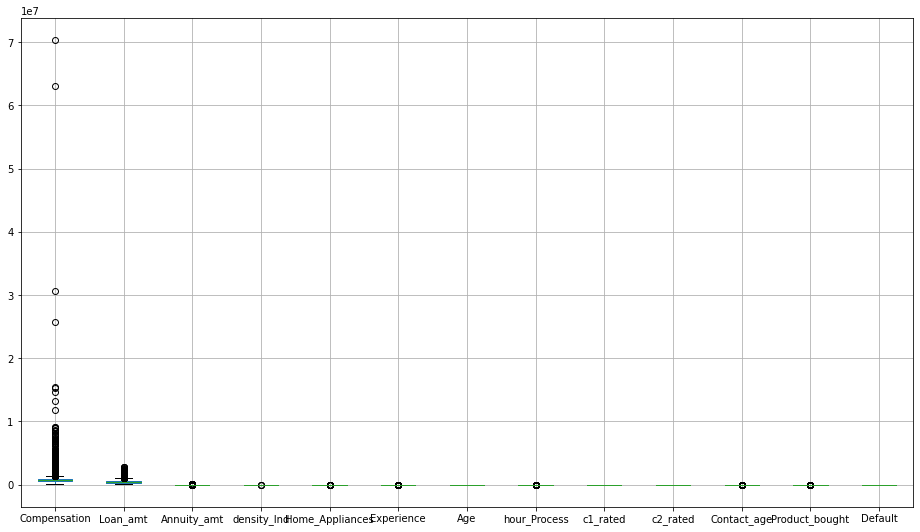

In [40]:
# construct box plot for continuous variables
plt.figure(figsize=(16,9))
dftvs_train.boxplot(vert=1)
plt.show()

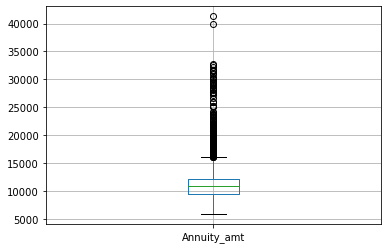

In [41]:
dftvs_train.boxplot(column=['Annuity_amt'])
plt.show()

In [42]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [43]:
lrco,urco=remove_outlier(dftvs_train["Compensation"])
dftvs_train["Compensation"]=np.where(dftvs_train["Compensation"]>urco,urco,dftvs_train["Compensation"])
dftvs_train["Compensation"]=np.where(dftvs_train["Compensation"]<lrco,lrco,dftvs_train["Compensation"])

lrlo,urlo=remove_outlier(dftvs_train["Loan_amt"])
dftvs_train["Loan_amt"]=np.where(dftvs_train["Loan_amt"]>urlo,urlo,dftvs_train["Loan_amt"])
dftvs_train["Loan_amt"]=np.where(dftvs_train["Loan_amt"]<lrlo,lrlo,dftvs_train["Loan_amt"])

lran,uran=remove_outlier(dftvs_train["Annuity_amt"])
dftvs_train["Annuity_amt"]=np.where(dftvs_train["Annuity_amt"]>uran,uran,dftvs_train["Annuity_amt"])
dftvs_train["Annuity_amt"]=np.where(dftvs_train["Annuity_amt"]<lran,lran,dftvs_train["Annuity_amt"])

lrde,urde=remove_outlier(dftvs_train["density_Ind"])
dftvs_train["density_Ind"]=np.where(dftvs_train["density_Ind"]>urde,urde,dftvs_train["density_Ind"])
dftvs_train["density_Ind"]=np.where(dftvs_train["density_Ind"]<lrde,lrde,dftvs_train["density_Ind"])

lrha,urha=remove_outlier(dftvs_train["Home_Appliances"])
dftvs_train["Home_Appliances"]=np.where(dftvs_train["Home_Appliances"]>urha,urha,dftvs_train["Home_Appliances"])
dftvs_train["Home_Appliances"]=np.where(dftvs_train["Home_Appliances"]<lrha,lrha,dftvs_train["Home_Appliances"])

lrex,urex=remove_outlier(dftvs_train["Experience"])
dftvs_train["Experience"]=np.where(dftvs_train["Experience"]>urex,urex,dftvs_train["Experience"])
dftvs_train["Experience"]=np.where(dftvs_train["Experience"]<lrex,lrex,dftvs_train["Experience"])

lrde,urde=remove_outlier(dftvs_train["Dependents"])
dftvs_train["Dependents"]=np.where(dftvs_train["Dependents"]>urde,urde,dftvs_train["Dependents"])
dftvs_train["Dependents"]=np.where(dftvs_train["Dependents"]<lrde,lrde,dftvs_train["Dependents"])


lrhp,urhp=remove_outlier(dftvs_train["hour_Process"])
dftvs_train["hour_Process"]=np.where(dftvs_train["hour_Process"]>urhp,urhp,dftvs_train["hour_Process"])
dftvs_train["hour_Process"]=np.where(dftvs_train["hour_Process"]<lrhp,lrhp,dftvs_train["hour_Process"])

lrca,urca=remove_outlier(dftvs_train["Contact_age"])
dftvs_train["Contact_age"]=np.where(dftvs_train["Contact_age"]>urca,urca,dftvs_train["Contact_age"])
dftvs_train["Contact_age"]=np.where(dftvs_train["Contact_age"]<lrca,lrca,dftvs_train["Contact_age"])

lrpb,urpb=remove_outlier(dftvs_train["Product_bought"])
dftvs_train["Product_bought"]=np.where(dftvs_train["Product_bought"]>urpb,urpb,dftvs_train["Product_bought"])
dftvs_train["Product_bought"]=np.where(dftvs_train["Product_bought"]<lrpb,lrpb,dftvs_train["Product_bought"])

dftvs_train.shape

(132440, 32)

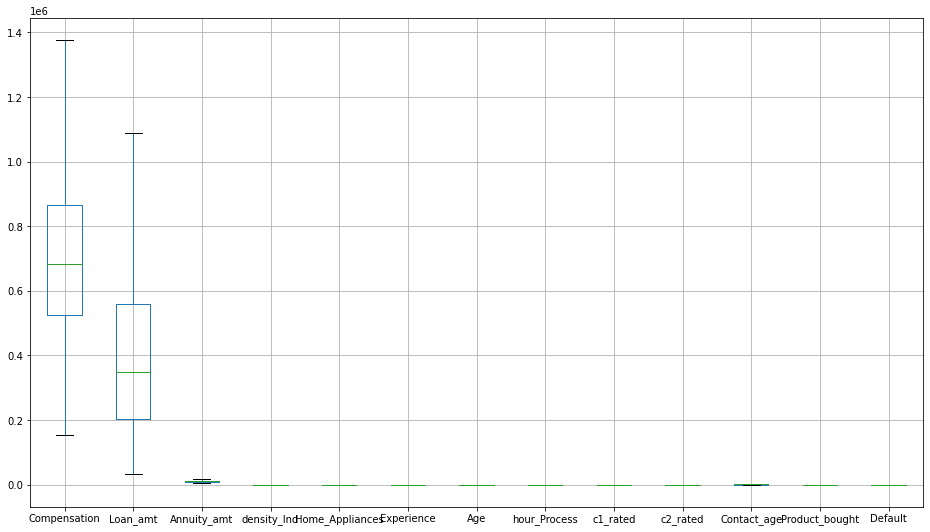

In [44]:
# construct box plot for continuous variables
plt.figure(figsize=(16,9))
dftvs_train.boxplot(vert=1)
plt.show()

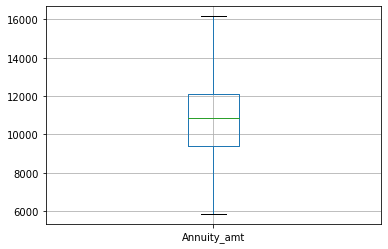

In [45]:
dftvs_train.boxplot(column=['Annuity_amt'])
plt.show()

In [51]:
dftvs_train["Education_det"].value_counts()

Grad      93858
P_Grad    32457
Other      6125
Name: Education_det, dtype: int64

In [47]:
dftrain.info()

NameError: name 'dftrain' is not defined

In [ ]:
numeric_cols = dftvs_train._get_numeric_data().columns  # numeric columns
cols = dftvs_train.columns  # all columns

In [ ]:
numeric_cols

## 04 Train EDA Process(Data Encoding) for Tvs_Train Data.

**We will be Cleaning the Data set and perform the exploratory data analysis on the dataset. The major topics to be covered are below:**
- **Encoding Categorical variables( Dummy Variables)**

### 04 Data Encoding on Tvs_Train_set Using OneHotEncoding Technique.

In [52]:
dftvs_train = pd.get_dummies(dftvs_train,drop_first = True)
dftvs_train.head()

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Age,hour_Process,c1_rated,c2_rated,...,Dependents_3.0,Dependents_4.0,Dependents_4.5,Company_Rating_2.0,Company_Rating_3.0,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes
0,801850.0,658040.0,13816.52,0.0304,3.220891,0.900000,46.0,10.0,0.077000,0.077,...,1,0,0,1,0,1,0,0,1,0
1,884222.0,198075.0,11173.06,0.0194,1.000000,3.000000,46.0,12.0,0.184000,0.184,...,1,0,0,0,0,0,1,0,1,1
2,284120.0,101056.0,8390.40,0.0118,4.000000,6.580616,57.0,5.0,0.538000,0.538,...,0,0,0,0,1,0,1,0,1,1
3,341874.0,179008.0,7184.13,0.0373,2.000000,4.700000,39.0,12.0,0.505929,0.561,...,0,1,0,1,0,0,0,1,1,1
4,1259895.0,573715.0,13212.77,0.0138,1.000000,6.900000,32.0,16.0,0.505929,0.200,...,1,0,0,0,0,0,1,0,1,1


In [53]:
dftvs_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Compensation            132440 non-null  float64
 1   Loan_amt                132440 non-null  float64
 2   Annuity_amt             132440 non-null  float64
 3   density_Ind             132440 non-null  float64
 4   Home_Appliances         132440 non-null  float64
 5   Experience              132440 non-null  float64
 6   Age                     132440 non-null  float64
 7   hour_Process            132440 non-null  float64
 8   c1_rated                132440 non-null  float64
 9   c2_rated                132440 non-null  float64
 10  Contact_age             132440 non-null  float64
 11  Product_bought          132440 non-null  float64
 12  Default                 132440 non-null  int64  
 13  Vehicle_Status_Y        132440 non-null  uint8  
 14  Job_Type_IT         

In [ ]:
dftvs_train[''].isna().sum()

In [54]:
dftvs_train.to_csv('Tvs_t.csv')

### ================================== ###

### Making different list for categorical columns and numerical columns for Tvs_Train_set.

In [ ]:
categorical = []
for col, value in dfts_train.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

In [ ]:
categorical

In [ ]:
numerical = dfts_train.columns.difference(categorical)
df_train_num = dfts_train[numerical]
df_train_num.shape

In [ ]:
plt.figure(figsize=(10,10))
df_train_num.boxplot(vert=0)
plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [ ]:
for column in df_train_num.columns:
    lr,ur=remove_outlier(df_train_num[column])
    df_train_num[column]=np.where(df_train_num[column]>ur,ur,df_train_num[column])
    df_train_num[column]=np.where(df_train_num[column]<lr,lr,df_train_num[column])

In [ ]:
plt.figure(figsize=(10,10))
df_train_num.boxplot(vert=0)
plt.show()

In [ ]:
df_train_num.boxplot(column=['Contact_age'])
plt.show()

In [ ]:
print("Outlier have been treated but there seems to be a need of scaling as Loan amount and compensation are with very high values compared to other variables")

## EDA Process(Scling/Normalization) for Tvs_Train Data.

**We will be Cleaning the Data set and perform the exploratory data analysis on the dataset. The major topics to be covered are below:**
- **Normalization and Scaling( Numerical Variables)**

In [ ]:
df_train_num.head()

In [ ]:
df_train_num= df_train_num.apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [ ]:
df_train_num.head()

In [ ]:
df_train_num.shape

### Checking the box plot after scaling of the train data.

In [ ]:
plt.figure(figsize=(10,10))
df_train_num.boxplot(vert=0)
plt.show()

In [ ]:
for column in df_train_num.columns:
    lr,ur=remove_outlier(df_train_num[column])
    df_train_num[column]=np.where(df_train_num[column]>ur,ur,df_train_num[column])
    df_train_num[column]=np.where(df_train_num[column]<lr,lr,df_train_num[column])

In [ ]:
plt.figure(figsize=(10,10))
df_train_num.boxplot(vert=0)
plt.show()

In [ ]:
df_train_cat = dfts_train[categorical]
df_train_cat.head()

In [ ]:
df_train_cat.shape

### Data Encoding USing Get Dummies after Scaling/Normalization.

In [ ]:
df_train_cat = pd.get_dummies(df_train_cat,drop_first = True)
df_train_cat.shape

## Creating The Final Dataset with combining of Numerical & Categorical Dataframes.

In [ ]:
dftvs_train_final = pd.concat([df_train_num, df_train_cat], axis=1)
dftvs_train_final.head()

In [ ]:
dftvs_train_final.tail(10)

In [ ]:
dftvs_train_final.tail(10)

### Checking the target variable classes of Tvs_train_set

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=dfts_train,x='Default')
plt.show()

In [ ]:
dfts_train["Default"].value_counts()

## EDA Process for Tvs_Test Data.

**We will be Cleaning the Data set and perform the exploratory data analysis on the dataset. The major topics to be covered are below:**

- **Univariate Analysis**
- **Bivariate Analysis**

## EDA Process(Data Cleaning) for Tvs_Test Data.

**We will be Cleaning the Data set and perform the exploratory data analysis on the dataset. The major topics to be covered are below:**

- **Removing duplicates**
- **Missing value treatment**
- **Outlier Treatment**

### 01 Check for Duplicates records For the TVS_Test_set Data.

In [ ]:
# 01 Check for duplicate data

dups = dftvs_test.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

In [ ]:
dftvs_test.info()

### Converting the data Type from Float to object for Tvs_Test_set.

In [ ]:
dftvs_test[['Company_Rating']] = dftvs_test[['Company_Rating']].astype('object')

In [ ]:
dftvs_test.info()

In [ ]:
dftvs_test.shape

### 02A Identifying Null Values & Treating the Missing Values for Tvs_Test_set.

In [ ]:
dftvs_test.isna().sum()

In [ ]:
dftvs_test.isnull().sum().sum()

### 02A (Imputing Null Values) Replacing NULL values in Numerical Columns & Categorical columns.

In [ ]:
for i in dftvs_test.columns:
    if (dftvs_test[i].dtype=='object'):
        dftvs_test[i].fillna(dftvs_test[i].mode()[0], inplace=True)
    elif (dftvs_test[i].dtype=='float64' or dftvs_test[i].dtype=='int64'):
        dftvs_test[i].fillna(dftvs_test[i].mean(), inplace=True)

In [ ]:
dftvs_test.isna().sum()

In [ ]:
dftvs_test.info()

### Converting the data Type from Float to object for Tvs_Test_set.

In [ ]:
dftvs_test[['Company_Rating']] = dftvs_test[['Company_Rating']].astype('object')

In [ ]:
dftvs_test[['Dependents']] = dftvs_test[['Dependents']].astype('object')

In [ ]:
dftvs_test.info()

### Copied the Dataframe to create seperate Scaled Dataframe final.

In [ ]:
dfts_test = dftvs_test.copy()
dfts_test.shape

In [ ]:
dfts_test.info()

### 03 Outlier Checking for Tvs_test_set & outlier treatment.

In [ ]:
# construct box plot for continuous variables
plt.figure(figsize=(16,9))
dftvs_test.boxplot(vert=1)
plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lrco,urco=remove_outlier(dftvs_test["Compensation"])
dftvs_test["Compensation"]=np.where(dftvs_test["Compensation"]>urco,urco,dftvs_test["Compensation"])
dftvs_test["Compensation"]=np.where(dftvs_test["Compensation"]<lrco,lrco,dftvs_test["Compensation"])

lrlo,urlo=remove_outlier(dftvs_test["Loan_amt"])
dftvs_test["Loan_amt"]=np.where(dftvs_test["Loan_amt"]>urlo,urlo,dftvs_test["Loan_amt"])
dftvs_test["Loan_amt"]=np.where(dftvs_test["Loan_amt"]<lrlo,lrlo,dftvs_test["Loan_amt"])

lran,uran=remove_outlier(dftvs_test["Annuity_amt"])
dftvs_test["Annuity_amt"]=np.where(dftvs_test["Annuity_amt"]>uran,uran,dftvs_test["Annuity_amt"])
dftvs_test["Annuity_amt"]=np.where(dftvs_test["Annuity_amt"]<lran,lran,dftvs_test["Annuity_amt"])

lrde,urde=remove_outlier(dftvs_test["density_Ind"])
dftvs_test["density_Ind"]=np.where(dftvs_test["density_Ind"]>urde,urde,dftvs_test["density_Ind"])
dftvs_test["density_Ind"]=np.where(dftvs_test["density_Ind"]<lrde,lrde,dftvs_test["density_Ind"])

lrha,urha=remove_outlier(dftvs_test["Home_Appliances"])
dftvs_test["Home_Appliances"]=np.where(dftvs_test["Home_Appliances"]>urha,urha,dftvs_test["Home_Appliances"])
dftvs_test["Home_Appliances"]=np.where(dftvs_test["Home_Appliances"]<lrha,lrha,dftvs_test["Home_Appliances"])

lrex,urex=remove_outlier(dftvs_test["Experience"])
dftvs_test["Experience"]=np.where(dftvs_test["Experience"]>urex,urex,dftvs_test["Experience"])
dftvs_test["Experience"]=np.where(dftvs_test["Experience"]<lrex,lrex,dftvs_test["Experience"])

lrde,urde=remove_outlier(dftvs_test["Dependents"])
dftvs_test["Dependents"]=np.where(dftvs_test["Dependents"]>urde,urde,dftvs_test["Dependents"])
dftvs_test["Dependents"]=np.where(dftvs_test["Dependents"]<lrde,lrde,dftvs_test["Dependents"])

lrhp,urhp=remove_outlier(dftvs_test["hour_Process"])
dftvs_test["hour_Process"]=np.where(dftvs_test["hour_Process"]>urhp,urhp,dftvs_test["hour_Process"])
dftvs_test["hour_Process"]=np.where(dftvs_test["hour_Process"]<lrhp,lrhp,dftvs_test["hour_Process"])

lrca,urca=remove_outlier(dftvs_test["Contact_age"])
dftvs_test["Contact_age"]=np.where(dftvs_test["Contact_age"]>urca,urca,dftvs_test["Contact_age"])
dftvs_test["Contact_age"]=np.where(dftvs_test["Contact_age"]<lrca,lrca,dftvs_test["Contact_age"])

lrpb,urpb=remove_outlier(dftvs_test["Product_bought"])
dftvs_test["Product_bought"]=np.where(dftvs_test["Product_bought"]>urpb,urpb,dftvs_test["Product_bought"])
dftvs_test["Product_bought"]=np.where(dftvs_test["Product_bought"]<lrpb,lrpb,dftvs_test["Product_bought"])

dftvs_test.shape

In [ ]:
# construct box plot for continuous variables
plt.figure(figsize=(16,9))
dftvs_test.boxplot(vert=1)
plt.show()

## 04 Test EDA Process(Data Cleaning) for Tvs_Test Data.

**We will be Cleaning the Data set and perform the exploratory data analysis on the dataset. The major topics to be covered are below:**
- **Encoding Categorical variables( Dummy Variables)**

In [ ]:
dftvs_test = pd.get_dummies(dftvs_test,drop_first = True)
dftvs_test.head()

In [ ]:
dftvs_test.info()

## Separating the categorical and numerical variables for Tvs_Test_set.

In [ ]:
categorical1 = []
for col, value in dfts_test.iteritems():
    if value.dtype == 'object':
        categorical1.append(col)

In [ ]:
categorical1

In [ ]:
numerical = dfts_test.columns.difference(categorical)
df_test_num = dfts_test[numerical]
df_test_num.shape

### ========================================================== ### 

In [ ]:
# construct box plot for continuous variables
plt.figure(figsize=(16,9))
df_test_num.boxplot(vert=1)
plt.show()

In [ ]:
for column in df_test_num.columns:
    lr,ur=remove_outlier(df_test_num[column])
    df_test_num[column]=np.where(df_test_num[column]>ur,ur,df_test_num[column])
    df_test_num[column]=np.where(df_test_num[column]<lr,lr,df_test_num[column])

In [ ]:
# construct box plot for continuous variables
plt.figure(figsize=(16,9))
df_test_num.boxplot(vert=1)
plt.show()

In [ ]:
###dftrain['Compensation'].value_counts().head()

## EDA Process(Data Cleaning) for Tvs_Test Data.

**We will be Cleaning the Data set and perform the exploratory data analysis on the dataset. The major topics to be covered are below:**
- **Normalization and Scaling( Numerical Variables)**

In [ ]:
df_test_num.head()

In [ ]:
df_test_num= df_test_num.apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [ ]:
df_test_num.head()

In [ ]:
df_test_num.shape

## Checking the box plot after scaling of the test data of Tvs_test_set

In [ ]:
plt.figure(figsize=(10,10))
df_test_num.boxplot(vert=0)
plt.show()

In [ ]:
for column in df_test_num.columns:
    lr,ur=remove_outlier(df_test_num[column])
    df_test_num[column]=np.where(df_test_num[column]>ur,ur,df_test_num[column])
    df_test_num[column]=np.where(df_test_num[column]<lr,lr,df_test_num[column])

In [ ]:
plt.figure(figsize=(10,10))
df_test_num.boxplot(vert=0)
plt.show()

In [ ]:
df_test_cat = dfts_test[categorical1]
df_test_cat.head()

In [ ]:
df_test_cat.shape

In [ ]:
df_test_cat = pd.get_dummies(df_test_cat,drop_first = True)
df_test_cat.shape

## Creating the final test Dataset as Tvs_test_set

In [ ]:
dftvs_test_final = pd.concat([df_test_num, df_test_cat], axis=1)

In [ ]:
dftvs_test_final.head()

In [ ]:
dftvs_test_final.tail(10)

In [ ]:
dftvs_test_final.info()

In [ ]:
dftvs_train_final['Default'].value_counts()

## Splitting the final dataset into  X & Y Variable.

In [ ]:
X = dftvs_train.drop(['Default'],axis=1)
y = dftvs_train['Default']

In [ ]:
X.shape

In [ ]:
X.head()

In [ ]:
y.shape

In [ ]:
y.head()

## Splitting the Dataset into Train & Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 1) ## Spliting for Ensemble Methods

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

## Model1: Logistics regression Default:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
LR_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=-1)
LR_model.fit(X_train, y_train)

In [ ]:
## Performance Matrix on train data set
y_train_pred_LR = LR_model.predict(X_train)
model_score = LR_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_pred_LR))

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

## Model 2: Logistics Regression After SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model2 = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=-1)
LR_model2.fit(X_train_smote, y_train_smote)

In [ ]:
## Performance Matrix on train data set
y_train_pred_LR2 = LR_model2.predict(X_train_smote)
model_score = LR_model2.score(X_train_smote, y_train_smote)
print(model_score)
print(metrics.confusion_matrix(y_train_smote, y_train_pred_LR2))
print(metrics.classification_report(y_train_smote, y_train_pred_LR2))

In [ ]:
## Performance Matrix on train data set
y_train_pred_LRt = LR_model2.predict(X_test)
model_score = LR_model2.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_train_pred_LRt))
print(metrics.classification_report(y_test, y_train_pred_LRt))

## Seperating the Data into X & Y from Combined(num & Cat Dataset) Final Dataset for KNN & Naive Bayes Model.

In [ ]:
X1 = dftvs_train_final.drop(['Default'],axis=1)
y1 = dftvs_train_final['Default']

In [ ]:
X1.head()

In [ ]:
y1.head()

In [ ]:
X1.shape

In [ ]:
y1.shape

### Split X and y into training and test set in 70:30 ratio.

### Spliting the Scaled & Encoded Varibles for the ML Models like: KNN, Naive Bayes, Neural Networks.

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20 , random_state=1)

In [ ]:
print('X1_train',X1_train.shape)
print('X1_test',X1_test.shape)
print('y1_train',y1_train.shape)
print('y1_test',y1_test.shape)

## Model 3: KNN With Default Parameters

### Default value n_neighbors=5, lets check the performance for K=7.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X1_train,y1_train)

In [ ]:
###y_pred_train_knn7 = KNN_model.predict(X1_train)
###y_pred_test_knn7 = KNN_model.predict(X1_test)

In [ ]:
##from sklearn import metrics
###dt_acc_train = metrics.accuracy_score(y1_train,y_pred_train_knn7)
dt_acc_val = metrics.accuracy_score(y1_test,y_pred_test_knn7)
print("Train Accuracy:",dt_acc_train)
print("Test Accuracy:",dt_acc_val)
print()

dt_clr_train = metrics.classification_report(y1_train,y_pred_train_knn7)
dt_clr_val = metrics.classification_report(y1_test,y_pred_test_knn7)
print("Train Classification Report:\n",dt_clr_train)
print("Test Classification Report:\n",dt_clr_val)

## Model 3: KNN With SMOTE Method.

In [ ]:
oversampled = SMOTE(random_state=1)
X_train_smote, y_train_smote = oversampled.fit_resample(X1_train, y1_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier(n_neighbors=19,leaf_size=50,p=2)
KNN_SM_model.fit(X_train_smote,y_train_smote)

In [ ]:
## Performance Matrix on train data set
y_train_pred_Knns = KNN_SM_model.predict(X_train_smote)
model_score = KNN_SM_model.score(X_train_smote, y_train_smote)
print(model_score)
print(metrics.confusion_matrix(y_train_smote, y_train_pred_Knns))
print(metrics.classification_report(y_train_smote, y_train_pred_Knns))

In [ ]:
## Performance Matrix on test data set
y_test_pred_kNNS = KNN_SM_model.predict(X1_test)
model_score = KNN_SM_model.score(X1_test, y1_test)
print(model_score)
print(metrics.confusion_matrix(y1_test, y_test_pred_kNNS))
print(metrics.classification_report(y1_test, y_test_pred_kNNS))

### Imputing Null Values Using KNN 

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
KNN_IMPUTER = KNNImputer(n_neighbors=7)

In [ ]:
num = [col for col in X1_train.columns if X1_train[col].dtypes != 'O']

In [ ]:
X1_train[num].head()

In [ ]:
KNN_IMPUTER.fit(X1_train[num])

In [ ]:
KNN_IMPUTER.transform(X1_train[num])

In [ ]:
X1_train[num].isna().sum()

# ============================================================= #

## Model 4: Gausian Naive Bayes Default model.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X1_train, y1_train)

#### Train Dataset Accuracy & f1 score

In [ ]:
y_train_pred_nb = NB_model.predict(X1_train)
model_score = NB_model.score(X1_train, y1_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y1_train, y_train_pred_nb))          ## confusion_matrix
print(metrics.classification_report(y1_train, y_train_pred_nb))     ## classification_report

In [ ]:
## Performance Matrix on test data set
y_test_pred_nbt = NB_model.predict(X1_test)
model_score = NB_model.score(X1_test, y1_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y1_test, y_test_pred_nbt))         ## confusion_matrix
print(metrics.classification_report(y1_test, y_test_pred_nbt))    ## classification_report

## Model 4: Gaussian Naive Bayes with SMOTE.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
oversampled = SMOTE(random_state=1)
X_train_smote, y_train_smote = oversampled.fit_resample(X1_train, y1_train)

In [ ]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_smote, y_train_smote)

In [ ]:
## Performance Matrix on train data set with SMOTE
y_train_pred_nbs = NB_SM_model.predict(X_train_smote)
model_score = NB_SM_model.score(X_train_smote, y_train_smote)
print(model_score)
print(metrics.confusion_matrix(y_train_smote, y_train_pred_nbs))
print(metrics.classification_report(y_train_smote ,y_train_pred_nbs))

In [ ]:
## Performance Matrix on test data set
y_test_pred_nbst = NB_SM_model.predict(X1_test)
model_score = NB_SM_model.score(X1_test, y1_test)
print(model_score)
print(metrics.confusion_matrix(y1_test, y_test_pred_nbst))
print(metrics.classification_report(y1_test, y_test_pred_nbst))

## Cross Validation on Naive Bayes Model

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_model, X1_train, y1_train, cv=10)
scores

In [ ]:
scores = cross_val_score(NB_model, X1_test, y1_test, cv=10)
scores

## CatBoost Classifier.

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
import catboost as ctb

In [ ]:
model_CBC = CatBoostClassifier()
model_CBC.fit(X1_train, y1_train)

In [ ]:
y_train_pred_cat = model_CBC.predict(X1_train)
y_test_pred_cat = model_CBC.predict(X1_test)

In [ ]:
## Performance Matrix on test data set
y_test_pred_Cat = model_CBC.predict(X1_test)
model_score = model_CBC.score(X1_test, y1_test)
print(model_score)
print(metrics.confusion_matrix(y1_test, y_test_pred_Cat))
print(metrics.classification_report(y1_test, y_test_pred_Cat))

## Model 5: Building Neural Network Model:

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
NN_model = MLPClassifier(hidden_layer_sizes=100, max_iter=10000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [ ]:
# Fit the model on the training data
NN_model.fit(X1_train, y1_train)

In [ ]:
## Performance Matrix on train data set with SMOTE
y_train_pred_NN = NN_model.predict(X1_train)
model_score = NN_model.score(X1_train, y1_train)
print(model_score)
print(metrics.confusion_matrix(y1_train, y_train_pred_NN))
print(metrics.classification_report(y1_train ,y_train_pred_NN))

## Model 5: Building Neural Network Model With SMOTE:

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
NN_model_SM = MLPClassifier(hidden_layer_sizes=100, max_iter=10000,
                     solver='adam', verbose=True,  random_state=123,tol=0.01,activation='relu',alpha=0.0001,)
NN_model_SM.fit(X1_train, y1_train)

In [ ]:
## Performance Matrix on train data set with SMOTE
y_train_pred_NNSM = NN_model_SM.predict(X1_train)
model_score = NN_model_SM.score(X1_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train_smote, y_train_pred_NNSM))
print(metrics.classification_report(y_train_smote ,y_train_pred_NNSM))

In [ ]:
## Performance Matrix on test data set
y_test_pred_NNSMT = NN_model_SM.predict(X1_test)
model_score = NN_model_SM.score(X1_test, y1_test)
print(model_score)
print(metrics.confusion_matrix(y1_test, y_test_pred_NNSMT))
print(metrics.classification_report(y1_test, y_test_pred_NNSMT))

## Model 5: Building Neural Network Model Tuning through Grid Search¶
### Below Code may take too much time.These values can be used instead {'hidden_layer_sizes': 500, 'max_iter': 5000, 'solver': 'adam', 'tol':  0.01}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [100,200,300],
    'max_iter': [2500,3000,4000],
    'solver': ['sgd','adam'],
    'tol': [0.01],
}

nncl = MLPClassifier(random_state=42)
grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)

In [ ]:
grid_search.fit(X1_train, y1_train)
print(grid_search.best_params_)
best_grid_ann = grid_search.best_estimator_
best_grid_ann

In [ ]:
y_train_pred_Ann = best_grid_ann.predict(X1_train)
y_test_pred_Ann = best_grid_ann.predict(X1_test)

In [ ]:
## Performance Matrix on train data set with SMOTE
y_train_pred_NNSMb = best_grid_ann.predict(X1_train)
model_score = best_grid_ann.score(X1_train, y1_train)
print(model_score)
print(metrics.confusion_matrix(y1_train, y_train_pred_NNSMb))
print(metrics.classification_report(y1_train ,y_train_pred_NNSMb))

In [ ]:
## Performance Matrix on test data set
y_test_pred_NNSMT = best_grid_ann.predict(X1_test)
model_score = best_grid_ann.score(X1_test, y1_test)
print(model_score)
print(metrics.confusion_matrix(y1_test, y_test_pred_NNSMT))
print(metrics.classification_report(y1_test, y_test_pred_NNSMT))

## Ensemble Models:

## Model 4: Decision Tree classifier with Default.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=55,max_features= 35,random_state=42)
dt_model.fit(X_train,y_train)

y_pred_train_dt = dt_model.predict(X_train)
y_pred_val_dt = dt_model.predict(X_test)

In [ ]:
from sklearn import metrics
dt_acc_train = metrics.accuracy_score(y_train,y_pred_train_dt)
dt_acc_val = metrics.accuracy_score(y_test,y_pred_val_dt)
print("Train Accuracy:",dt_acc_train)
print("Test Accuracy:",dt_acc_val)
print()

dt_clr_train = metrics.classification_report(y_train,y_pred_train_dt)
dt_clr_val = metrics.classification_report(y_test,y_pred_val_dt)
print("Train Classification Report:\n",dt_clr_train)
print("Test Classification Report:\n",dt_clr_val)

## Model 4: Model Tuning through Grid Search for Decision Tree Classifier.

#### Grid search for finding out the optimal values for the hyper parameters and fitting the optimal values to the training data set

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [10,20,30],
    'max_features': [10,11,12],
    'min_samples_leaf': [120.140,160],
    'min_samples_split': [200,250,300]
}
dt_model_g = DecisionTreeClassifier(criterion='entropy',random_state=42)
grid_search = GridSearchCV(estimator = dt_model_g, 
                           param_grid = param_grid, cv = 5,
                           scoring='recall'
                          )

In [ ]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid_deg = grid_search.best_estimator_
best_grid_deg

In [ ]:
y_train_pred_gri = best_grid_deg.predict(X_train)
y_test_pred_gri = best_grid_deg.predict(X_test)

In [ ]:
from sklearn import metrics
dt_acc_train = metrics.accuracy_score(y_train,y_train_pred_gri)
dt_acc_val = metrics.accuracy_score(y_test,y_test_pred_gri)
print("Train Accuracy:",dt_acc_train)
print("Test Accuracy:",dt_acc_val)
print()


dt_clr_train = metrics.classification_report(y_train,y_train_pred_gri)
dt_clr_val = metrics.classification_report(y_test,y_test_pred_gri)
print("Train Classification Report:\n",dt_clr_train)
print("Test Classification Report:\n",dt_clr_val)

## Model 6: Model Building - Random Forest Classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=150, max_depth= 20, max_features= 20, random_state = 42)
rf_model.fit(X_train,y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_val_rf = rf_model.predict(X_test)

In [ ]:
from sklearn import metrics
rf_acc_train = metrics.accuracy_score(y_train,y_pred_train_rf)
rf_acc_val = metrics.accuracy_score(y_test,y_pred_val_rf)
print("Train Accuracy:",rf_acc_train)
print("Test Accuracy:",rf_acc_val)
print()

rf_clr_train = metrics.classification_report(y_train,y_pred_train_rf)
rf_clr_val = metrics.classification_report(y_test,y_pred_val_rf)
print("Train Classification Report:\n",rf_clr_train)
print("Test Classification Report:\n",rf_clr_val)

## Boosting
### Ensemble Technique - Boosting:¶
#### Importing the Necessary Libraries:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ADB_model_rf = AdaBoostClassifier(base_estimator=dt_model, learning_rate=0.1)
ADB_model_rf.fit(X_train,y_train)

In [ ]:
y_train_pred_abd = ADB_model_rf.predict(X_train)
y_test_pred_abd = ADB_model_rf.predict(X_test)

In [ ]:
from sklearn import metrics
ab_acc_train = metrics.accuracy_score(y_train,y_train_pred_abd)
ab_acc_val = metrics.accuracy_score(y_test,y_test_pred_abd)
print("Train Accuracy:",ab_acc_train)
print("Test Accuracy:",ab_acc_val)
print()

ab_clr_train = metrics.classification_report(y_train,y_train_pred_abd)
ab_clr_val = metrics.classification_report(y_test,y_test_pred_abd)
print("Train Classification Report:\n",ab_clr_train)
print("Test Classification Report:\n",ab_clr_val)

### Model 7: XGBoost with Default

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("f1_score on training set : ",metrics.f1_score(y_train,pred_train))
        print("f1_score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators = 350, random_state=123)
xgb.fit(X_train,y_train)

In [ ]:
## Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(xgb)

In [ ]:
# Choose the type of classifier. 
# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,300),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}
xgb_tuned = XGBClassifier(random_state=123)

In [ ]:
# Type of scoring used to compare parameter combinations
##acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
best_grid_xgb = grid_obj.best_estimator_
best_grid_xgb

## Hyper Parameter Optimization for XGBoost 

In [ ]:
params={
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]   
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
from xgboost import XGBClassifier

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
classifier=xgboost.XGBClassifier()
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=10,verbose=3)

In [ ]:
random_search.fit(X1_train,y1_train)

In [ ]:
print(random_search.best_estimator_)

In [ ]:
best_rand_xgb = random_search.best_estimator_
best_rand_xgb

In [ ]:
y_train_pred_ran = best_rand_xgb.predict(X1_train)
y_test_pred_ran = best_rand_xgb.predict(X1_test)

In [ ]:
from sklearn import metrics
dt_acc_train = metrics.accuracy_score(y1_train,y_train_pred_ran)
dt_acc_val = metrics.accuracy_score(y1_test,y_test_pred_ran)
print("Train Accuracy:",dt_acc_train)
print("Test Accuracy:",dt_acc_val)
print()

dt_clr_train = metrics.classification_report(y1_train,y_train_pred_ran)
dt_clr_val = metrics.classification_report(y1_test,y_test_pred_ran)
print("Train Classification Report:\n",dt_clr_train)
print("Test Classification Report:\n",dt_clr_val)

### Submissions.

In [ ]:
final_predictions = xgb.predict(dftvs_test)
submission=pd.DataFrame([test_file_ids,final_predictions]).T
submission.rename(columns={"ID": "Default"},inplace=True)
submission.to_csv('submission.csv',index = False)